# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [10]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [11]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [23]:
#realizando a regressão

reg_1 = smf.ols('tip ~ net_bill', data = tips).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        15:40:48   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

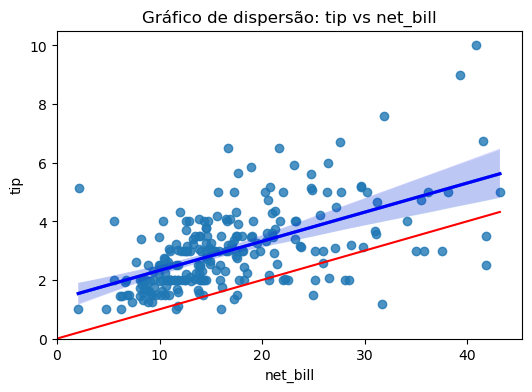

In [19]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips)
sns.regplot(x='net_bill', y='tip', data=tips, scatter=False, color='blue')

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

plt.title('Gráfico de dispersão: tip vs net_bill')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [24]:
reg_2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        15:41:00   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

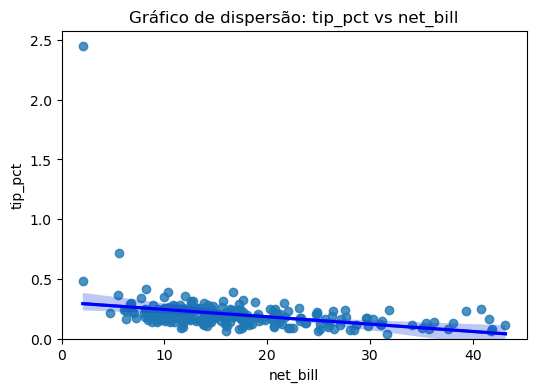

In [22]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter=False, color='blue')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

plt.title('Gráfico de dispersão: tip_pct vs net_bill')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O valor da gorjeta varia diretamente ao valor da conta, seguindo uma função afim com inclinação 0.1.

Quando comparamos o valor da gorjeta percentualmente, vemos uma queda, ou seja, para contas maiores, é pago como gorjeta um valor progressivamente menor percentualmente em relação aos 10%.

Não podemos comparar diretamente os R²  valores são muito diferentes. No item 1, o R2 de 0.3 é bastante mais preciso que 0.09

obs.: claramente há um outlier no ponto 2.5, ou seja, com 250% do valor da conta em gorjeta, no treinamento de um modelo, eu excluiria esse ponto.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [28]:
pred_tip_pct = reg_2.fittedvalues
pred_tip_pct.head()

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

In [36]:
pred_tip = pred_tip_pct * tips['net_bill']

pred_tip.head()

0    3.309254
1    2.186938
2    3.461450
3    3.668785
4    3.699998
dtype: float64

In [40]:
#aplicando a fórmula manualmente para obter o R2
#não achei nenhum método que fizesse isso diretamente nessa biblioteca


y_obs = tips['tip']
y_pred = pred_tip
mean_y = y_obs.mean()

SS_res = ((y_obs - y_pred) ** 2).sum()  
SS_tot = ((y_obs - mean_y) ** 2).sum()  
R2_tip = 1 - (SS_res / SS_tot)


R2_tip

0.10889974845461325

No item 1, o R2 era de 0.33 e caiu para 0.1, ou seja, o modelo explica menos os dados.